In [1]:
import numpy as np
import pandas as pd
from glob import glob

In [2]:
#Function to concat all the csv files into one file
def concat(outfile = 'concat-data.csv'): #outfile = "name of the output file"
    filenames = glob('./data/E*.csv') #many filenames have similar pattern 
    dataframes = []
    for files in filenames:
        dataframes.append(pd.read_csv(files))
    concatDF = pd.concat(dataframes, axis=0,sort=False) #axis=0 to concat vertically
    concatDF.to_csv('./data/'+ outfile, index = None) #index=None for no indexing
    
concat() #concat function call
    
data = pd.read_csv('./data/concat-data.csv')
data = data.dropna(axis = 'columns', how = 'any',thresh=4000)  #drops the columns with null values 

display(data)
#views the first five lines

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,BWA,IWH,IWD,IWA,WHH,WHD,WHA,VCH,VCD,VCA
0,E0,10/8/2018,Man United,Leicester,2.0,1.0,H,1.0,0.0,H,...,7.50,1.55,3.80,7.00,1.57,3.8,6.00,1.57,4.0,7.00
1,E0,11/8/2018,Bournemouth,Cardiff,2.0,0.0,H,1.0,0.0,H,...,4.40,1.90,3.50,4.10,1.91,3.5,4.00,1.87,3.6,4.75
2,E0,11/8/2018,Fulham,Crystal Palace,0.0,2.0,A,0.0,1.0,A,...,2.95,2.40,3.30,2.95,2.45,3.3,2.80,2.50,3.4,3.00
3,E0,11/8/2018,Huddersfield,Chelsea,0.0,3.0,A,0.0,2.0,A,...,1.57,6.20,4.00,1.55,5.80,3.9,1.57,6.50,4.0,1.62
4,E0,11/8/2018,Newcastle,Tottenham,1.0,2.0,A,1.0,2.0,A,...,2.00,3.70,3.35,2.05,3.80,3.2,2.05,3.90,3.4,2.10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4036,E0,22/01/2020,Leicester,West Ham,4.0,1.0,H,2.0,0.0,H,...,5.75,1.53,4.40,5.80,1.52,4.4,6.00,1.53,4.4,6.25
4037,E0,22/01/2020,Tottenham,Norwich,2.0,1.0,H,1.0,0.0,H,...,7.25,1.43,4.80,6.80,1.40,4.8,8.00,1.40,4.8,8.00
4038,E0,22/01/2020,Man United,Burnley,0.0,2.0,A,0.0,1.0,A,...,7.75,1.42,4.55,7.60,1.40,4.5,8.50,1.40,4.5,9.00
4039,E0,23/01/2020,Wolves,Liverpool,1.0,2.0,A,0.0,1.0,A,...,1.62,5.40,3.95,1.65,5.80,3.9,1.62,5.50,4.0,1.62


In [3]:
#displaying the teams of the league
read_data = pd.read_csv('./data/E0.csv')
team_list = read_data['HomeTeam']
team_name=[]
for teams in team_list:
    if teams not in team_name:
        team_name.append(teams)
print("\n\nTeams in Season: 2019-2020")
display(team_name)
print (type(team_name))



Teams in Season: 2019-2020


['Liverpool',
 'West Ham',
 'Bournemouth',
 'Burnley',
 'Crystal Palace',
 'Watford',
 'Tottenham',
 'Leicester',
 'Newcastle',
 'Man United',
 'Arsenal',
 'Aston Villa',
 'Brighton',
 'Everton',
 'Norwich',
 'Southampton',
 'Man City',
 'Sheffield United',
 'Chelsea',
 'Wolves']

<class 'list'>


In [4]:
#WIN RATE FOR THE HOME TEAM
matches = data.shape[0] #[0] for X-axis
features = data.shape[1] - 1  #[1] for Y-axis (total features - Labels to be determined)

homewins = len(data[data.FTR == 'H'])
win_rate = (float(homewins)/(matches))*100

print("Total no of matches: {}".format(matches))
print("Number of Features: {}".format(features))
print("Number of matches won by HOME: {}".format(homewins))
print("Win rate of HOME team: {}".format(win_rate))

Total no of matches: 4041
Number of Features: 37
Number of matches won by HOME: 1862
Win rate of HOME team: 46.07770353872804


In [5]:
def getTeamData(teamName):
#     print("\n"+ teamName + "\n")
    
    #Num of goals in wins and looses
    gamesHome = data[data['HomeTeam']== teamName]
    totalGoalsScored = gamesHome['FTHG'].sum()
    
    gamesAway = data[data['AwayTeam'] == teamName]
    totalGames = gamesHome.append(gamesAway)
    numGames = len(totalGames.index)
    totalGoalsScored += gamesAway['FTAG'].sum() 
    
    
    #total goals allowed 
    totalGoalsAllowed = gamesHome['FTHG'].sum()
    totalGoalsAllowed += gamesAway['FTAG'].sum()
    
    #discipline TOTAL RED AND YELLOW CARDS
    totalYellowCards = gamesHome['HY'].sum()
    totalYellowCards += gamesAway['AY'].sum()
    
    totalRedCards = gamesHome['HR'].sum()
    totalRedCards += gamesAway['AR'].sum()
    
    
    #total Fouls
    totalFouls = gamesHome['HF'].sum()
    totalFouls += gamesAway['AF'].sum()
    
    
    #total Corners
    totalCorners = gamesHome['HC'].sum()
    totalCorners += gamesAway['AC'].sum()
    
    
    #shots per game (SPG) = totalshots / totalgames
    totalShots = gamesHome['HS'].sum()
    totalShots += gamesAway['AS'].sum()
    
    #avg shots allowed per game
    totalShotsAgainst = gamesHome['AS'].sum()
    totalShotsAgainst += gamesAway['HS'].sum()
    if numGames != 0:
        HSPG = totalShots / numGames #HomeShotsPerGame
        ASPG = totalShotsAgainst / numGames #AwayShotsPerGame
#         display("HSPG: {}".format(HSPG))
#         display("ASPG: {}".format(ASPG))
    
    #games won percentage= GamesWon / numGames
    gamesWon = totalGames[totalGames['FTR']== "H"]
    gamesLost = totalGames[totalGames['FTR'] == "A"]
    gamesDraw = totalGames[totalGames['FTR'] == "D"]
    numGamesWon = len(gamesWon.index)
    numGamesLost = len(gamesLost.index)
    numGamesDraw = len(gamesDraw.index)
    
    if numGames != 0:
        gamesWonPercent = numGamesWon / numGames
        gamesLostPercent = numGamesLost / numGames
        gamesDrawPercent = numGamesDraw / numGames 
    
#     print("Games Win Percent: {}".format(gamesWonPercent))
#     print("Games Loose Percent: {}".format(gamesLostPercent))
#     print("Games Draw Percent: {}".format(gamesDrawPercent))
    
    
    #Total shots on target:
    totalShotsOnTarget = gamesHome['HST'].sum()
    totalShotsOnTarget += gamesAway['AST'].sum()
    
    #GoalSaves
    goalSaves = totalShotsOnTarget - totalGoalsAllowed
    
    #Goal Save Percentage
    if totalShotsOnTarget != 0:
        goalSavesPercent = goalSaves / totalShotsOnTarget
        
    #Goal Save Ratio
    if goalSaves != 0:
        saveRatio = totalShotsOnTarget / goalSaves
    
    #Goal scoring Percent
    if totalShots != 0 :
        scoringPercent = (totalShots - totalGoalsScored)/totalShots
    
    #Goal scoring Ration
    if totalGoalsScored != 0:
        scoringRatio = totalShotsOnTarget / totalGoalsScored
        
    if numGames == 0: 
        gamesWon = 0
        gamesLost = 0
        gamesDraw = 0 
        totalGoalsScored = 0 
        totalShotsOnTarget = 0 
        totalGoalsAllowed = 0 
        totalYellowCards = 0 
        totalRedCards = 0 
        totalFouls = 0 
        totalCorners = 0 
        totalShots = 0 
        totalShotsAgainst = 0 
        HSPG = 0 #HomeShotsPerGame 
        ASPG = 0 #AwayShotsPerGame 
        goalSaves = 0 
        goalSavesPercent = 0 
        scoringPercent = 0 
        saveRatio = 0 
        scoringRatio = 0
    
    return [teamName, totalGoalsScored, totalShotsOnTarget, totalGoalsAllowed, 
            totalYellowCards, totalRedCards,totalFouls, totalCorners, 
            totalShots, totalShotsAgainst, HSPG, ASPG, goalSaves, goalSavesPercent, scoringPercent,
            saveRatio, scoringRatio]


In [6]:
# getTeamData('Chelsea')   #to check the team stats

new_datalist = []
for team in team_name:
    team_vector = getTeamData(team) 
    new_datalist.append(team_vector)
    
teamStats = pd.DataFrame(new_datalist, columns=['TeamName', 'totalGoalsScored', 'totalShotsOnTarget', 'totalGoalsAllowed', 
            'totalYellowCards', 'totalRedCards','totalFouls', 'totalCorners', 
            'totalShots', 'totalShotsAgainst', 'HSPG', 'ASPG', 'goalSaves', 'goalSavesPercent', 'scoringPercent',
            'saveRatio', 'scoringRatio'])

In [7]:
display(teamStats)

,TeamName,totalGoalsScored,totalShotsOnTarget,totalGoalsAllowed,totalYellowCards,totalRedCards,totalFouls,totalCorners,totalShots,totalShotsAgainst,HSPG,ASPG,goalSaves,goalSavesPercent,scoringPercent,saveRatio,scoringRatio
0,Liverpool,761.0,2769.0,761.0,569.0,25.0,4092.0,2638.0,6369.0,3904.0,15.764851,9.663366,2008.0,0.725172,0.880515,1.378984,3.638633
1,West Ham,458.0,1742.0,458.0,632.0,26.0,3915.0,1871.0,4385.0,5352.0,11.980874,14.622951,1284.0,0.737084,0.895553,1.356698,3.803493
2,Bournemouth,224.0,701.0,224.0,265.0,8.0,1628.0,943.0,2066.0,2422.0,11.738636,13.761364,477.0,0.680456,0.891578,1.469602,3.129464
3,Burnley,218.0,792.0,218.0,369.0,7.0,2245.0,920.0,2196.0,3365.0,10.261682,15.724299,574.0,0.724747,0.900729,1.379791,3.633028
4,Crystal Palace,287.0,943.0,287.0,422.0,10.0,2936.0,1317.0,2946.0,3455.0,11.690476,13.710317,656.0,0.695652,0.902580,1.437500,3.285714
5,Watford,197.0,639.0,197.0,348.0,19.0,2137.0,802.0,2021.0,2255.0,11.482955,12.812500,442.0,0.691706,0.902524,1.445701,3.243655
6,Tottenham,701.0,2804.0,701.0,642.0,24.0,4189.0,2584.0,6301.0,4528.0,15.596535,11.207921,2103.0,0.750000,0.888748,1.333333,4.000000
7,Leicester,321.0,927.0,321.0,300.0,18.0,2266.0,1164.0,2684.0,2791.0,12.542056,13.042056,606.0,0.653722,0.880402,1.529703,2.887850
8,Newcastle,389.0,1605.0,389.0,536.0,32.0,3574.0,1573.0,3921.0,4195.0,11.954268,12.789634,1216.0,0.757632,0.900791,1.319901,4.125964
9,Man United,737.0,2579.0,737.0,669.0,25.0,4470.0,2459.0,5712.0,4438.0,14.138614,10.985149,1842.0,0.714230,0.870973,1.400109,3.499322


In [8]:
# display(data.isnull().sum())
# teamStats.isnull().sum()
# #comparision of the attributes for nullness in whole data and selected data

In [9]:
import seaborn as se
se.set(rc={'figure.figsize':(13.7,10.27)})
totalGoalsScored = se.barplot(teamStats.TeamName, teamStats.totalGoalsScored,palette="Blues_d") 
for item in totalGoalsScored.get_xticklabels():
    item.set_rotation(90)
    

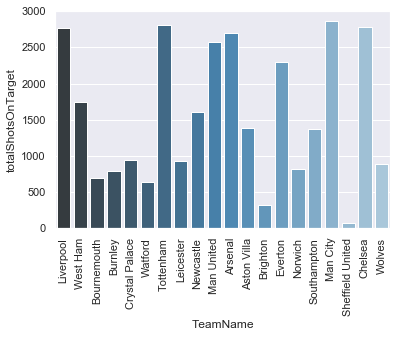

In [10]:
totalShotsOnTargetPlot = se.barplot(teamStats.TeamName, teamStats.totalShotsOnTarget,palette="Blues_d")
for item in totalShotsOnTargetPlot.get_xticklabels():
    item.set_rotation(90)
    

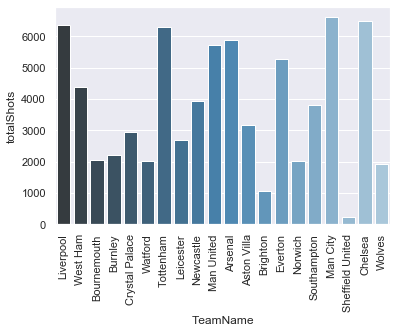

In [11]:
totalShotsPlot = se.barplot(teamStats.TeamName, teamStats.totalShots,palette="Blues_d") 
for item in totalShotsPlot.get_xticklabels():
    item.set_rotation(90)

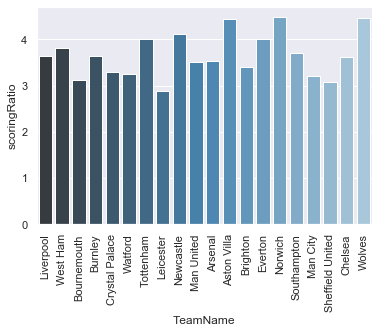

In [12]:
scoringRatioPlot = se.barplot(teamStats.TeamName, teamStats.scoringRatio,palette="Blues_d") 
for item in scoringRatioPlot.get_xticklabels():
    item.set_rotation(90)

In [13]:
# to check if the all teams are present 
filteredData = data[(data.HomeTeam.isin(team_name))]
data = filteredData[(filteredData.AwayTeam.isin(team_name))]

In [14]:
# Separate into feature set and target variable
X_data = data.drop(['FTR'],1)
y_data = data['FTR']
y_data = pd.DataFrame(y_data)
y_data.replace({"FTR":{'H':1,'A':2,'D':0}},inplace=True)     #replace the strings with integer

# Z_data = X_data.drop(['Date','FTHG','FTAG','HTHG','HTAG','HTR','Referee'],1)
# Z_data = X_data.drop(['Date','HTR','Referee'],1)
Z_data = data[['FTHG','FTAG','HTHG','HTAG','HS','AS','HST','HF','AF','HY','AY','HR','AR','HC','AC','AST','HC','AC']]

# print(X_data)
# print(y_data)
# print((Z_data))
Z_data['FTHG'].tail()

4036    4.0
4037    2.0
4038    0.0
4039    1.0
4040    0.0
Name: FTHG, dtype: float64

In [15]:
# print(type(y_data))

In [16]:
# Standardising the data.

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
Z_data = scaler.fit_transform(Z_data)
Z_data = pd.DataFrame(Z_data,columns=['FTHG','FTAG','HTHG','HTAG','HS','AS','HST','HF','AF','HY','AY','HR','AR','HC','AC','AST','HC','AC'])
print((Z_data))


       FTHG      FTAG  HTHG  HTAG        HS        AS       HST        HF  \
0     0.250  0.111111   0.2   0.0  0.205128  0.413793  0.285714  0.478261   
1     0.125  0.222222   0.2   0.4  0.384615  0.482759  0.095238  0.478261   
2     0.250  0.000000   0.2   0.0  0.487179  0.172414  0.238095  0.434783   
3     0.250  0.222222   0.2   0.2  0.282051  0.172414  0.190476  0.347826   
4     0.000  0.222222   0.0   0.2  0.230769  0.551724  0.142857  0.478261   
...     ...       ...   ...   ...       ...       ...       ...       ...   
1969  0.500  0.111111   0.4   0.0  0.487179  0.172414  0.380952  0.434783   
1970  0.250  0.111111   0.2   0.0  0.358974  0.379310  0.142857  0.521739   
1971  0.000  0.222222   0.0   0.2  0.615385  0.137931  0.333333  0.478261   
1972  0.125  0.222222   0.0   0.2  0.256410  0.413793  0.142857  0.260870   
1973  0.000  0.222222   0.0   0.2  0.179487  0.413793  0.190476  0.260870   

        AF        HY        AY   HR   AR        HC        AC       AST  \
0

In [17]:
# #we want continous vars that are integers for our input data, so lets remove any categorical vars
# def preprocess_features(Z):
#     ''' Preprocesses the football data and converts catagorical variables into dummy variables. '''
    
#     # Initialize new output DataFrame
#     output = pd.DataFrame(index = Z.index)

#     # Investigate each feature column for the data
#     for col, col_data in Z.iteritems():

#         # If data type is categorical, convert to dummy variables
#         if col_data.dtype == object:
#             col_data = pd.get_dummies(col_data, prefix = col)
                    
#         # Collect the revisedd columns
#         output = output.join(col_data)
    
#     return output

In [18]:
# from keras.utils import to_categorical
# Z_data = to_categorical(Z_data)

In [19]:
# Z_data = preprocess_features(Z_data)
# display(Z_data)

In [20]:
from sklearn.model_selection import train_test_split

# Shuffle and split the dataset into training and testing set.
X_train, X_test, y_train, y_test = train_test_split(Z_data, y_data, 
                                                    test_size = 50,
                                                    random_state = 2,
                                                    stratify = y_data)
print(X_train)
print(y_train)

       FTHG      FTAG  HTHG  HTAG        HS        AS       HST        HF  \
1350  0.125  0.111111   0.0   0.2  0.256410  0.482759  0.142857  0.347826   
1550  0.125  0.111111   0.2   0.2  0.435897  0.206897  0.428571  0.478261   
109   0.125  0.000000   0.2   0.0  0.358974  0.448276  0.190476  0.478261   
632   0.125  0.000000   0.0   0.0  0.384615  0.241379  0.095238  0.652174   
133   0.625  0.000000   0.6   0.0  0.256410  0.448276  0.333333  0.173913   
...     ...       ...   ...   ...       ...       ...       ...       ...   
1811  0.000  0.222222   0.0   0.0  0.461538  0.206897  0.095238  0.478261   
589   0.250  0.333333   0.2   0.0  0.256410  0.551724  0.333333  0.565217   
1215  0.125  0.222222   0.0   0.2  0.333333  0.413793  0.190476  0.565217   
1630  0.375  0.000000   0.2   0.0  0.205128  0.413793  0.142857  0.565217   
187   0.125  0.111111   0.0   0.0  0.564103  0.275862  0.285714  0.304348   

        AF        HY        AY   HR   AR        HC        AC       AST  \
1

In [21]:
from keras.utils import to_categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
display((y_train))

Using TensorFlow backend.


array([[1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       ...,
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.]], dtype=float32)

In [22]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD,Adagrad
from keras import regularizers
from keras.callbacks import EarlyStopping

model = Sequential([
    Dense(100,input_shape=(18,),activation='relu',),
    Dense(80,activation='relu',kernel_regularizer=regularizers.l1(0.001)),
    Dense(500,activation='relu',kernel_regularizer=regularizers.l1(0.001)),
    Dense(100,activation='relu',kernel_regularizer=regularizers.l1(0.001)),
    Dense(3,activation='softmax',kernel_regularizer=regularizers.l1(0.001)),
])
model.compile(optimizer=Adagrad(lr=0.001),loss='mean_squared_error',metrics=['accuracy'])
# model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 100)               1900      
_________________________________________________________________
dense_2 (Dense)              (None, 80)                8080      
_________________________________________________________________
dense_3 (Dense)              (None, 500)               40500     
_________________________________________________________________
dense_4 (Dense)              (None, 100)               50100     
_________________________________________________________________
dense_5 (Dense)              (None, 3)                 303       
Total params: 100,883
Trainable params: 100,883
Non-trainable params: 0
_________________________________________________________________


In [23]:
model.fit(x=X_train,y=y_train,batch_size=64,epochs=1000,validation_split=0.2,
        #callbacks=[EarlyStopping(monitor='val_loss',patience=0.001)]
         )

Train on 1539 samples, validate on 385 samples
Epoch 1/1000
1539/1539 [==============================] - 2s 1ms/step - loss: 5.0407 - accuracy: 0.4600 - val_loss: 4.7120 - val_accuracy: 0.4494
Epoch 2/1000
1539/1539 [==============================] - 0s 215us/step - loss: 4.5321 - accuracy: 0.4698 - val_loss: 4.3498 - val_accuracy: 0.4494
Epoch 3/1000
1539/1539 [==============================] - 0s 133us/step - loss: 4.2199 - accuracy: 0.4698 - val_loss: 4.0825 - val_accuracy: 0.4494
Epoch 4/1000
1539/1539 [==============================] - 0s 106us/step - loss: 3.9773 - accuracy: 0.4698 - val_loss: 3.8644 - val_accuracy: 0.4494
Epoch 5/1000
1539/1539 [==============================] - ETA: 0s - loss: 3.7897 - accuracy: 0.46 - 0s 106us/step - loss: 3.7745 - accuracy: 0.4698 - val_loss: 3.6773 - val_accuracy: 0.4494
Epoch 6/1000
1539/1539 [==============================] - 0s 115us/step - loss: 3.5983 - accuracy: 0.4698 - val_loss: 3.5126 - val_accuracy: 0.4494
Epoch 7/1000
1539/1539 [=

1539/1539 [==============================] - 0s 99us/step - loss: 0.8727 - accuracy: 0.4698 - val_loss: 0.8635 - val_accuracy: 0.4494
Epoch 56/1000
1539/1539 [==============================] - 0s 114us/step - loss: 0.8522 - accuracy: 0.4698 - val_loss: 0.8434 - val_accuracy: 0.4494
Epoch 57/1000
1539/1539 [==============================] - 0s 114us/step - loss: 0.8323 - accuracy: 0.4698 - val_loss: 0.8238 - val_accuracy: 0.4494
Epoch 58/1000
1539/1539 [==============================] - 0s 140us/step - loss: 0.8129 - accuracy: 0.4698 - val_loss: 0.8048 - val_accuracy: 0.4494
Epoch 59/1000
1539/1539 [==============================] - 0s 205us/step - loss: 0.7942 - accuracy: 0.4698 - val_loss: 0.7863 - val_accuracy: 0.4494
Epoch 60/1000
1539/1539 [==============================] - 0s 142us/step - loss: 0.7760 - accuracy: 0.4698 - val_loss: 0.7684 - val_accuracy: 0.4494
Epoch 61/1000
1539/1539 [==============================] - 0s 113us/step - loss: 0.7583 - accuracy: 0.4698 - val_loss: 0.

1539/1539 [==============================] - 0s 114us/step - loss: 0.3683 - accuracy: 0.4698 - val_loss: 0.3695 - val_accuracy: 0.4494
Epoch 111/1000
1539/1539 [==============================] - 0s 98us/step - loss: 0.3665 - accuracy: 0.4698 - val_loss: 0.3677 - val_accuracy: 0.4494
Epoch 112/1000
1539/1539 [==============================] - 0s 103us/step - loss: 0.3647 - accuracy: 0.4698 - val_loss: 0.3659 - val_accuracy: 0.4494
Epoch 113/1000
1539/1539 [==============================] - 0s 98us/step - loss: 0.3629 - accuracy: 0.4698 - val_loss: 0.3642 - val_accuracy: 0.4494
Epoch 114/1000
1539/1539 [==============================] - 0s 102us/step - loss: 0.3612 - accuracy: 0.4698 - val_loss: 0.3625 - val_accuracy: 0.4494
Epoch 115/1000
1539/1539 [==============================] - 0s 107us/step - loss: 0.3595 - accuracy: 0.4698 - val_loss: 0.3608 - val_accuracy: 0.4494
Epoch 116/1000
1539/1539 [==============================] - 0s 128us/step - loss: 0.3578 - accuracy: 0.4698 - val_los

1539/1539 [==============================] - 0s 113us/step - loss: 0.2949 - accuracy: 0.4698 - val_loss: 0.2969 - val_accuracy: 0.4494
Epoch 165/1000
1539/1539 [==============================] - 0s 131us/step - loss: 0.2939 - accuracy: 0.4698 - val_loss: 0.2959 - val_accuracy: 0.4494
Epoch 166/1000
1539/1539 [==============================] - 0s 107us/step - loss: 0.2929 - accuracy: 0.4698 - val_loss: 0.2949 - val_accuracy: 0.4494
Epoch 167/1000
1539/1539 [==============================] - 0s 117us/step - loss: 0.2919 - accuracy: 0.4698 - val_loss: 0.2939 - val_accuracy: 0.4494
Epoch 168/1000
1539/1539 [==============================] - 0s 114us/step - loss: 0.2909 - accuracy: 0.4698 - val_loss: 0.2929 - val_accuracy: 0.4494
Epoch 169/1000
1539/1539 [==============================] - 0s 122us/step - loss: 0.2900 - accuracy: 0.4698 - val_loss: 0.2919 - val_accuracy: 0.4494
Epoch 170/1000
1539/1539 [==============================] - 0s 103us/step - loss: 0.2890 - accuracy: 0.4698 - val_l

Epoch 219/1000
1539/1539 [==============================] - 0s 114us/step - loss: 0.2520 - accuracy: 0.4698 - val_loss: 0.2543 - val_accuracy: 0.4494
Epoch 220/1000
1539/1539 [==============================] - 0s 113us/step - loss: 0.2514 - accuracy: 0.4698 - val_loss: 0.2538 - val_accuracy: 0.4494
Epoch 221/1000
1539/1539 [==============================] - 0s 141us/step - loss: 0.2509 - accuracy: 0.4698 - val_loss: 0.2532 - val_accuracy: 0.4494
Epoch 222/1000
1539/1539 [==============================] - 0s 150us/step - loss: 0.2503 - accuracy: 0.4698 - val_loss: 0.2527 - val_accuracy: 0.4494
Epoch 223/1000
1539/1539 [==============================] - 0s 129us/step - loss: 0.2498 - accuracy: 0.4698 - val_loss: 0.2521 - val_accuracy: 0.4494
Epoch 224/1000
1539/1539 [==============================] - 0s 119us/step - loss: 0.2493 - accuracy: 0.4698 - val_loss: 0.2516 - val_accuracy: 0.4494
Epoch 225/1000
1539/1539 [==============================] - 0s 117us/step - loss: 0.2487 - accuracy:

1539/1539 [==============================] - 0s 96us/step - loss: 0.2296 - accuracy: 0.4698 - val_loss: 0.2322 - val_accuracy: 0.4494
Epoch 274/1000
1539/1539 [==============================] - 0s 156us/step - loss: 0.2293 - accuracy: 0.4698 - val_loss: 0.2319 - val_accuracy: 0.4494
Epoch 275/1000
1539/1539 [==============================] - 0s 113us/step - loss: 0.2290 - accuracy: 0.4698 - val_loss: 0.2316 - val_accuracy: 0.4494
Epoch 276/1000
1539/1539 [==============================] - 0s 121us/step - loss: 0.2288 - accuracy: 0.4698 - val_loss: 0.2314 - val_accuracy: 0.4494
Epoch 277/1000
1539/1539 [==============================] - 0s 121us/step - loss: 0.2285 - accuracy: 0.4698 - val_loss: 0.2311 - val_accuracy: 0.4494
Epoch 278/1000
1539/1539 [==============================] - 0s 98us/step - loss: 0.2282 - accuracy: 0.4698 - val_loss: 0.2308 - val_accuracy: 0.4494
Epoch 279/1000
1539/1539 [==============================] - 0s 138us/step - loss: 0.2280 - accuracy: 0.4698 - val_los

Epoch 328/1000
1539/1539 [==============================] - 0s 150us/step - loss: 0.2205 - accuracy: 0.4698 - val_loss: 0.2233 - val_accuracy: 0.4494
Epoch 329/1000
1539/1539 [==============================] - 0s 153us/step - loss: 0.2204 - accuracy: 0.4698 - val_loss: 0.2232 - val_accuracy: 0.4494
Epoch 330/1000
1539/1539 [==============================] - 0s 126us/step - loss: 0.2204 - accuracy: 0.4698 - val_loss: 0.2232 - val_accuracy: 0.4494
Epoch 331/1000
1539/1539 [==============================] - 0s 121us/step - loss: 0.2203 - accuracy: 0.4698 - val_loss: 0.2231 - val_accuracy: 0.4494
Epoch 332/1000
1539/1539 [==============================] - 0s 119us/step - loss: 0.2203 - accuracy: 0.4698 - val_loss: 0.2231 - val_accuracy: 0.4494
Epoch 333/1000
1539/1539 [==============================] - 0s 117us/step - loss: 0.2202 - accuracy: 0.4698 - val_loss: 0.2230 - val_accuracy: 0.4494
Epoch 334/1000
1539/1539 [==============================] - 0s 123us/step - loss: 0.2202 - accuracy:

1539/1539 [==============================] - 0s 167us/step - loss: 0.2190 - accuracy: 0.4698 - val_loss: 0.2219 - val_accuracy: 0.4494
Epoch 383/1000
1539/1539 [==============================] - 0s 179us/step - loss: 0.2190 - accuracy: 0.4698 - val_loss: 0.2218 - val_accuracy: 0.4494
Epoch 384/1000
1539/1539 [==============================] - 0s 145us/step - loss: 0.2190 - accuracy: 0.4698 - val_loss: 0.2218 - val_accuracy: 0.4494
Epoch 385/1000
1539/1539 [==============================] - 0s 131us/step - loss: 0.2190 - accuracy: 0.4698 - val_loss: 0.2218 - val_accuracy: 0.4494
Epoch 386/1000
1539/1539 [==============================] - 0s 119us/step - loss: 0.2189 - accuracy: 0.4698 - val_loss: 0.2218 - val_accuracy: 0.4494
Epoch 387/1000
1539/1539 [==============================] - 0s 111us/step - loss: 0.2189 - accuracy: 0.4698 - val_loss: 0.2218 - val_accuracy: 0.4494
Epoch 388/1000
1539/1539 [==============================] - 0s 147us/step - loss: 0.2189 - accuracy: 0.4698 - val_l

Epoch 437/1000
1539/1539 [==============================] - 0s 109us/step - loss: 0.2181 - accuracy: 0.4698 - val_loss: 0.2209 - val_accuracy: 0.4494
Epoch 438/1000
1539/1539 [==============================] - 0s 109us/step - loss: 0.2181 - accuracy: 0.4698 - val_loss: 0.2209 - val_accuracy: 0.4494
Epoch 439/1000
1539/1539 [==============================] - 0s 101us/step - loss: 0.2180 - accuracy: 0.4698 - val_loss: 0.2209 - val_accuracy: 0.4494
Epoch 440/1000
1539/1539 [==============================] - 0s 105us/step - loss: 0.2180 - accuracy: 0.4698 - val_loss: 0.2209 - val_accuracy: 0.4494
Epoch 441/1000
1539/1539 [==============================] - 0s 108us/step - loss: 0.2180 - accuracy: 0.4698 - val_loss: 0.2209 - val_accuracy: 0.4494
Epoch 442/1000
1539/1539 [==============================] - 0s 105us/step - loss: 0.2180 - accuracy: 0.4698 - val_loss: 0.2209 - val_accuracy: 0.4494
Epoch 443/1000
1539/1539 [==============================] - 0s 107us/step - loss: 0.2180 - accuracy:

1539/1539 [==============================] - 0s 116us/step - loss: 0.2174 - accuracy: 0.4698 - val_loss: 0.2203 - val_accuracy: 0.4494
Epoch 492/1000
1539/1539 [==============================] - 0s 115us/step - loss: 0.2174 - accuracy: 0.4698 - val_loss: 0.2203 - val_accuracy: 0.4494
Epoch 493/1000
1539/1539 [==============================] - 0s 123us/step - loss: 0.2174 - accuracy: 0.4698 - val_loss: 0.2203 - val_accuracy: 0.4494
Epoch 494/1000
1539/1539 [==============================] - 0s 116us/step - loss: 0.2174 - accuracy: 0.4698 - val_loss: 0.2203 - val_accuracy: 0.4494
Epoch 495/1000
1539/1539 [==============================] - 0s 113us/step - loss: 0.2174 - accuracy: 0.4698 - val_loss: 0.2203 - val_accuracy: 0.4494
Epoch 496/1000
1539/1539 [==============================] - 0s 107us/step - loss: 0.2174 - accuracy: 0.4698 - val_loss: 0.2203 - val_accuracy: 0.4494
Epoch 497/1000
1539/1539 [==============================] - 0s 106us/step - loss: 0.2173 - accuracy: 0.4698 - val_l

Epoch 546/1000
1539/1539 [==============================] - 0s 111us/step - loss: 0.2169 - accuracy: 0.4698 - val_loss: 0.2199 - val_accuracy: 0.4494
Epoch 547/1000
1539/1539 [==============================] - 0s 125us/step - loss: 0.2169 - accuracy: 0.4698 - val_loss: 0.2199 - val_accuracy: 0.4494
Epoch 548/1000
1539/1539 [==============================] - 0s 116us/step - loss: 0.2169 - accuracy: 0.4698 - val_loss: 0.2198 - val_accuracy: 0.4494
Epoch 549/1000
1539/1539 [==============================] - 0s 119us/step - loss: 0.2169 - accuracy: 0.4698 - val_loss: 0.2198 - val_accuracy: 0.4494
Epoch 550/1000
1539/1539 [==============================] - 0s 115us/step - loss: 0.2169 - accuracy: 0.4698 - val_loss: 0.2198 - val_accuracy: 0.4494
Epoch 551/1000
1539/1539 [==============================] - 0s 135us/step - loss: 0.2169 - accuracy: 0.4698 - val_loss: 0.2198 - val_accuracy: 0.4494
Epoch 552/1000
1539/1539 [==============================] - 0s 103us/step - loss: 0.2169 - accuracy:

1539/1539 [==============================] - 0s 103us/step - loss: 0.2166 - accuracy: 0.4698 - val_loss: 0.2196 - val_accuracy: 0.4494
Epoch 601/1000
1539/1539 [==============================] - 0s 126us/step - loss: 0.2166 - accuracy: 0.4698 - val_loss: 0.2195 - val_accuracy: 0.4494
Epoch 602/1000
1539/1539 [==============================] - 0s 120us/step - loss: 0.2166 - accuracy: 0.4698 - val_loss: 0.2195 - val_accuracy: 0.4494
Epoch 603/1000
1539/1539 [==============================] - 0s 114us/step - loss: 0.2166 - accuracy: 0.4698 - val_loss: 0.2195 - val_accuracy: 0.4494
Epoch 604/1000
1539/1539 [==============================] - 0s 111us/step - loss: 0.2166 - accuracy: 0.4698 - val_loss: 0.2195 - val_accuracy: 0.4494
Epoch 605/1000
1539/1539 [==============================] - 0s 135us/step - loss: 0.2166 - accuracy: 0.4698 - val_loss: 0.2195 - val_accuracy: 0.4494
Epoch 606/1000
1539/1539 [==============================] - 0s 149us/step - loss: 0.2166 - accuracy: 0.4698 - val_l

Epoch 655/1000
1539/1539 [==============================] - 0s 131us/step - loss: 0.2164 - accuracy: 0.4698 - val_loss: 0.2193 - val_accuracy: 0.4494
Epoch 656/1000
1539/1539 [==============================] - 0s 112us/step - loss: 0.2164 - accuracy: 0.4698 - val_loss: 0.2193 - val_accuracy: 0.4494
Epoch 657/1000
1539/1539 [==============================] - 0s 117us/step - loss: 0.2163 - accuracy: 0.4698 - val_loss: 0.2193 - val_accuracy: 0.4494
Epoch 658/1000
1539/1539 [==============================] - 0s 143us/step - loss: 0.2163 - accuracy: 0.4698 - val_loss: 0.2193 - val_accuracy: 0.4494
Epoch 659/1000
1539/1539 [==============================] - 0s 113us/step - loss: 0.2163 - accuracy: 0.4698 - val_loss: 0.2193 - val_accuracy: 0.4494
Epoch 660/1000
1539/1539 [==============================] - 0s 134us/step - loss: 0.2163 - accuracy: 0.4698 - val_loss: 0.2193 - val_accuracy: 0.4494
Epoch 661/1000
1539/1539 [==============================] - 0s 136us/step - loss: 0.2163 - accuracy:

1539/1539 [==============================] - 0s 160us/step - loss: 0.2162 - accuracy: 0.4698 - val_loss: 0.2191 - val_accuracy: 0.4494
Epoch 710/1000
1539/1539 [==============================] - 0s 110us/step - loss: 0.2162 - accuracy: 0.4698 - val_loss: 0.2191 - val_accuracy: 0.4494
Epoch 711/1000
1539/1539 [==============================] - 0s 126us/step - loss: 0.2162 - accuracy: 0.4698 - val_loss: 0.2191 - val_accuracy: 0.4494
Epoch 712/1000
1539/1539 [==============================] - 0s 124us/step - loss: 0.2162 - accuracy: 0.4698 - val_loss: 0.2191 - val_accuracy: 0.4494
Epoch 713/1000
1539/1539 [==============================] - 0s 122us/step - loss: 0.2162 - accuracy: 0.4698 - val_loss: 0.2191 - val_accuracy: 0.4494
Epoch 714/1000
1539/1539 [==============================] - 0s 132us/step - loss: 0.2161 - accuracy: 0.4698 - val_loss: 0.2191 - val_accuracy: 0.4494
Epoch 715/1000
1539/1539 [==============================] - 0s 132us/step - loss: 0.2161 - accuracy: 0.4698 - val_l

Epoch 764/1000
1539/1539 [==============================] - 0s 136us/step - loss: 0.2160 - accuracy: 0.4698 - val_loss: 0.2190 - val_accuracy: 0.4494
Epoch 765/1000
1539/1539 [==============================] - 0s 129us/step - loss: 0.2160 - accuracy: 0.4698 - val_loss: 0.2190 - val_accuracy: 0.4494
Epoch 766/1000
1539/1539 [==============================] - 0s 131us/step - loss: 0.2160 - accuracy: 0.4698 - val_loss: 0.2189 - val_accuracy: 0.4494
Epoch 767/1000
1539/1539 [==============================] - 0s 126us/step - loss: 0.2160 - accuracy: 0.4698 - val_loss: 0.2189 - val_accuracy: 0.4494
Epoch 768/1000
1539/1539 [==============================] - 0s 142us/step - loss: 0.2160 - accuracy: 0.4698 - val_loss: 0.2189 - val_accuracy: 0.4494
Epoch 769/1000
1539/1539 [==============================] - 0s 132us/step - loss: 0.2160 - accuracy: 0.4698 - val_loss: 0.2189 - val_accuracy: 0.4494
Epoch 770/1000
1539/1539 [==============================] - 0s 139us/step - loss: 0.2160 - accuracy:

1539/1539 [==============================] - 0s 120us/step - loss: 0.2158 - accuracy: 0.4698 - val_loss: 0.2188 - val_accuracy: 0.4494
Epoch 819/1000
1539/1539 [==============================] - 0s 102us/step - loss: 0.2158 - accuracy: 0.4698 - val_loss: 0.2188 - val_accuracy: 0.4494
Epoch 820/1000
1539/1539 [==============================] - 0s 105us/step - loss: 0.2158 - accuracy: 0.4698 - val_loss: 0.2188 - val_accuracy: 0.4494
Epoch 821/1000
1539/1539 [==============================] - 0s 102us/step - loss: 0.2158 - accuracy: 0.4698 - val_loss: 0.2188 - val_accuracy: 0.4494
Epoch 822/1000
1539/1539 [==============================] - 0s 112us/step - loss: 0.2158 - accuracy: 0.4698 - val_loss: 0.2188 - val_accuracy: 0.4494
Epoch 823/1000
1539/1539 [==============================] - 0s 139us/step - loss: 0.2158 - accuracy: 0.4698 - val_loss: 0.2188 - val_accuracy: 0.4494 - loss: 0.2156 - accuracy: 0.47
Epoch 824/1000
1539/1539 [==============================] - 0s 144us/step - loss: 0

1539/1539 [==============================] - 0s 103us/step - loss: 0.2157 - accuracy: 0.4698 - val_loss: 0.2187 - val_accuracy: 0.4494
Epoch 873/1000
1539/1539 [==============================] - 0s 137us/step - loss: 0.2157 - accuracy: 0.4698 - val_loss: 0.2187 - val_accuracy: 0.4494
Epoch 874/1000
1539/1539 [==============================] - 0s 117us/step - loss: 0.2157 - accuracy: 0.4698 - val_loss: 0.2187 - val_accuracy: 0.4494
Epoch 875/1000
1539/1539 [==============================] - 0s 114us/step - loss: 0.2157 - accuracy: 0.4698 - val_loss: 0.2187 - val_accuracy: 0.4494
Epoch 876/1000
1539/1539 [==============================] - 0s 113us/step - loss: 0.2157 - accuracy: 0.4698 - val_loss: 0.2187 - val_accuracy: 0.4494
Epoch 877/1000
1539/1539 [==============================] - 0s 152us/step - loss: 0.2157 - accuracy: 0.4698 - val_loss: 0.2187 - val_accuracy: 0.4494
Epoch 878/1000
1539/1539 [==============================] - 0s 139us/step - loss: 0.2157 - accuracy: 0.4698 - val_l

Epoch 927/1000
1539/1539 [==============================] - 0s 117us/step - loss: 0.2156 - accuracy: 0.4698 - val_loss: 0.2185 - val_accuracy: 0.4494
Epoch 928/1000
1539/1539 [==============================] - 0s 124us/step - loss: 0.2156 - accuracy: 0.4698 - val_loss: 0.2185 - val_accuracy: 0.4494
Epoch 929/1000
1539/1539 [==============================] - 0s 143us/step - loss: 0.2156 - accuracy: 0.4698 - val_loss: 0.2185 - val_accuracy: 0.4494
Epoch 930/1000
1539/1539 [==============================] - 0s 122us/step - loss: 0.2156 - accuracy: 0.4698 - val_loss: 0.2185 - val_accuracy: 0.4494
Epoch 931/1000
1539/1539 [==============================] - 0s 124us/step - loss: 0.2156 - accuracy: 0.4698 - val_loss: 0.2185 - val_accuracy: 0.4494
Epoch 932/1000
1539/1539 [==============================] - 0s 143us/step - loss: 0.2156 - accuracy: 0.4698 - val_loss: 0.2185 - val_accuracy: 0.4494
Epoch 933/1000
1539/1539 [==============================] - 0s 125us/step - loss: 0.2155 - accuracy:

1539/1539 [==============================] - 0s 126us/step - loss: 0.2155 - accuracy: 0.4698 - val_loss: 0.2184 - val_accuracy: 0.4494
Epoch 982/1000
1539/1539 [==============================] - 0s 125us/step - loss: 0.2154 - accuracy: 0.4698 - val_loss: 0.2184 - val_accuracy: 0.4494
Epoch 983/1000
1539/1539 [==============================] - 0s 140us/step - loss: 0.2154 - accuracy: 0.4698 - val_loss: 0.2184 - val_accuracy: 0.4494
Epoch 984/1000
1539/1539 [==============================] - 0s 122us/step - loss: 0.2154 - accuracy: 0.4698 - val_loss: 0.2184 - val_accuracy: 0.4494
Epoch 985/1000
1539/1539 [==============================] - 0s 118us/step - loss: 0.2154 - accuracy: 0.4698 - val_loss: 0.2184 - val_accuracy: 0.4494
Epoch 986/1000
1539/1539 [==============================] - 0s 118us/step - loss: 0.2154 - accuracy: 0.4698 - val_loss: 0.2184 - val_accuracy: 0.4494
Epoch 987/1000
1539/1539 [==============================] - 0s 119us/step - loss: 0.2154 - accuracy: 0.4698 - val_l

In [24]:
model.evaluate(x=X_test,y=y_test,batch_size=64)

50/50 [==============================] - 0s 11us/step


[0.21665136516094208, 0.46000000834465027]